In [25]:
import pandas as pd
import xlrd as xl
import numpy as np
import seaborn as sns
import os.path
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#import pandas_datareader.data as web
import yfinance as yf
from statsmodels.tsa.stattools import coint, adfuller
import statsmodels.api as sm
import datetime
plt.rcParams['figure.figsize'] = [20,8]


In [63]:
data = pd.read_csv('../datasets/data_cart.csv', index_col=0)
data = data.iloc[(data.shape[0]-250):].copy()
data

,ABEV3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BPAC11,BRAP4,...,SUZB3,TAEE11,TIMP3,TOTS3,UGPA3,USIM5,VALE3,VIVT4,VVAR3,WEGE3
Data,,,,,,,,,,,,,,,,,,,,,
18/06/2019,18.05,45.25,38.11,51.65,32.19,36.35,32.05,8.20,48.87,32.99,...,33.38,26.70,11.21,44.75,21.34,8.78,52.00,50.14,5.07,20.64
19/06/2019,18.20,45.40,37.39,52.50,32.94,36.80,31.73,8.02,49.60,33.12,...,33.00,26.95,11.51,44.99,20.95,8.66,52.30,49.71,5.06,21.17
21/06/2019,18.45,44.26,39.75,52.91,33.70,37.63,32.20,7.95,50.35,33.03,...,33.76,26.83,11.86,43.49,21.40,8.69,52.44,49.88,5.10,21.43
24/06/2019,18.30,43.57,39.70,53.04,33.85,37.93,32.11,7.95,49.80,33.19,...,34.52,27.15,11.91,43.59,21.47,8.74,52.40,50.28,5.11,21.58
25/06/2019,18.17,42.60,37.66,52.55,33.27,37.61,31.75,7.94,49.50,32.30,...,33.60,26.80,11.75,42.68,20.81,8.47,51.38,49.69,5.04,21.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15/06/2020,13.43,22.15,49.51,33.07,19.55,21.15,26.35,13.10,60.81,35.53,...,38.49,28.39,14.34,21.17,17.86,6.36,53.88,48.48,15.62,44.27
16/06/2020,13.26,22.59,49.50,33.50,20.19,22.03,26.15,13.93,62.90,36.37,...,38.10,28.34,14.75,21.03,17.50,6.55,55.39,49.50,15.15,44.76
17/06/2020,13.77,22.62,51.20,34.50,20.46,22.38,27.09,13.42,64.06,37.16,...,38.90,28.74,14.63,22.15,18.10,6.77,56.20,49.70,15.14,46.16


In [64]:
stock_1 = 'AZUL4'
stock_2 = 'BBSE3'
df = data[[stock_1, stock_2]]

In [65]:
# Calcula o spread entre os dois ativos 
df['SPREAD'] = df[stock_1] - df[stock_2]
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AZUL4,BBSE3,SPREAD
Data,,,
18/06/2019,45.25,32.05,13.20
19/06/2019,45.40,31.73,13.67
21/06/2019,44.26,32.20,12.06
24/06/2019,43.57,32.11,11.46
25/06/2019,42.60,31.75,10.85


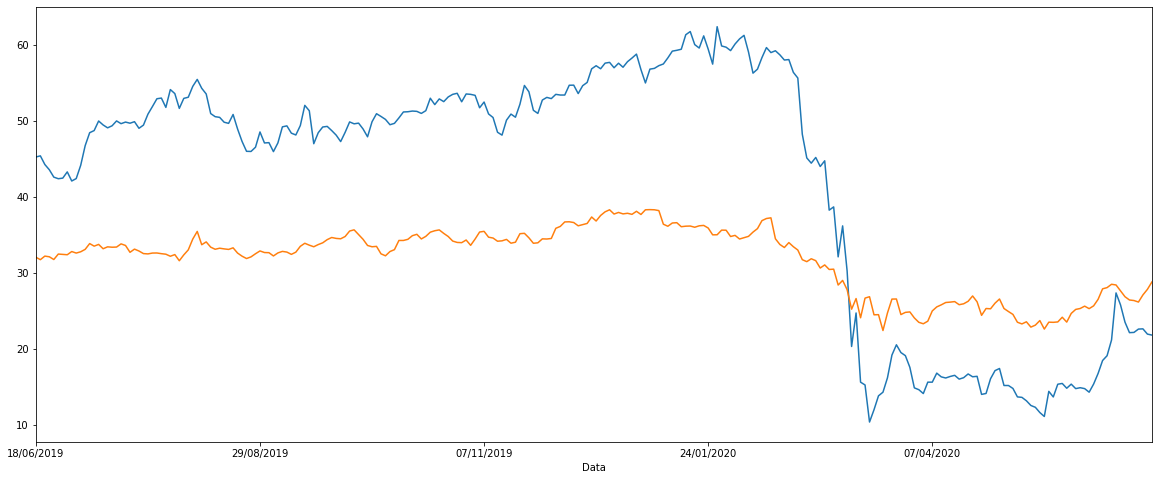

In [66]:
# Plota o gráfico de linha dos ativos
df[stock_1].plot()
df[stock_2].plot()
plt.show()

In [67]:
# ## 4. Realiza o treino com os dados dos ativo
# Selecionando amostra para o treinamento
X_train, y_train = df[stock_1], df[stock_2]
# Cria o treino da coluna spread tbm 
spread_train = X_train - y_train
#print(y_train)

In [68]:
#5. Verifica se os pares são cointegrados e dá retorno para o usuário

# A função coint retorna 3 valors: t stat, p-value and critical value
t, p, crit = coint(X_train,y_train)

In [69]:
# Teste do p-valor
print(p)
if p <0.05:
    print('O par é Cointegrado!.')
else:
    print('O par NÃO é Cointegrado!.')

0.0015774684045101613
O par é Cointegrado!.


In [70]:
# Fazendo teste adf para verificar estacionariedade
pval_spread = adfuller(spread_train)[1]
if pval_spread <0.05:
    print(pval_spread,'Dados são estacionários!')
else:
    print(pval_spread, 'Dados NÃO são estacionários!')

0.8851152779769997 Dados NÃO são estacionários!


In [71]:
#build linear model to find beta that gives I(0) combination of pair
X = sm.add_constant(y_train)
result = sm.OLS(X_train,X).fit()

print(result.params)

const   -73.038805
BBSE3     3.624776
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [72]:
#define new stationary spread as 'z'
#'b' value gives the parameter of our linear model
b = result.params[stock_2]
#simply define our new cointegrated series as z = stock - b* stock
z = X_train - b * y_train
print(b)

3.62477586434834


In [73]:
# Rodar teste adf novamente após a regressão linear
z_pval = adfuller(z)[1]

if z_pval<0.01:
    print('O resíduo é estacionário.')
else:
    print('O resíduo NÃO é estacionário.')

O resíduo é estacionário.


In [74]:
# ## 7. Plota em um gráfico o Resíduo onde wnxergamos de forma gráfica a estacionariedade do resíduo desse par

#calculate cointegrated series 'full_z' for the whole (train + test) dataset
spread = df['SPREAD']
serie_z = df[stock_1] - b * df[stock_2]

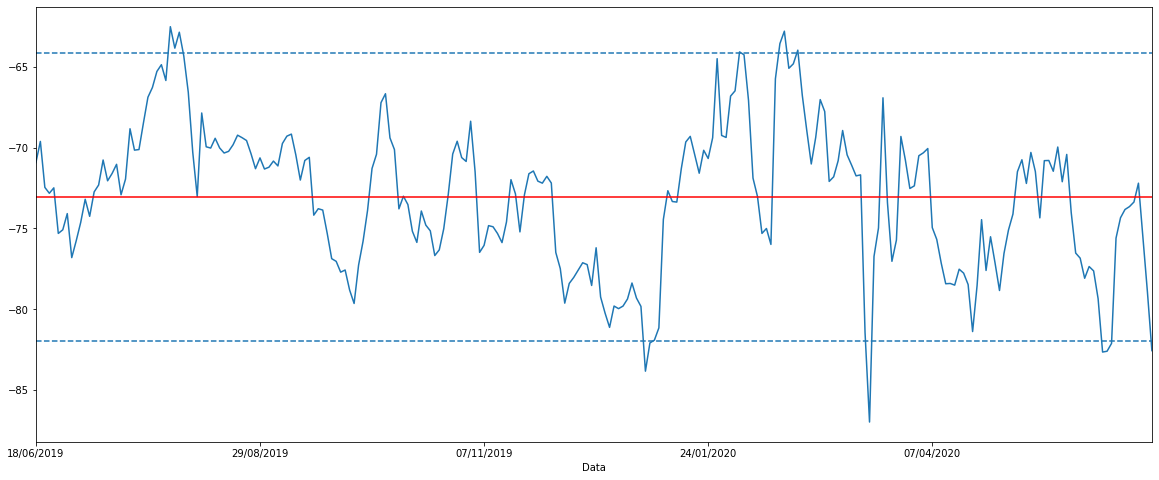

In [149]:
#lets plot the raw spread, the stationary spread and for reference the 'spread daily percent change' or 'returns'
#the green vertical line shows the end of the training set period.
serie_z_mean = serie_z.mean()
serie_z.plot()
plt.axhline(serie_z_mean+(2*serie_z.std()),ls ='--')
plt.axhline(serie_z.mean(),color='r')
plt.axhline(serie_z_mean-(2*serie_z.std()),ls ='--')

plt.show()

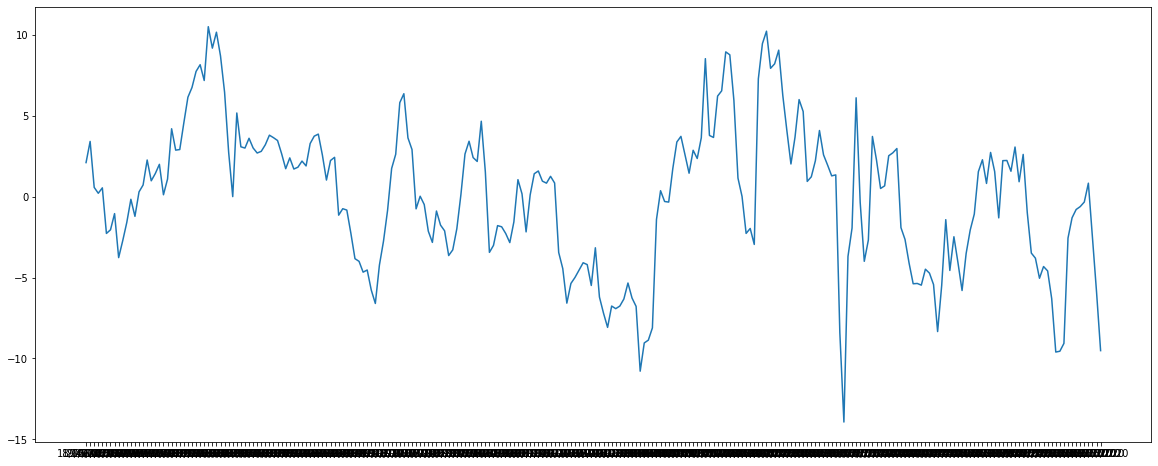

In [76]:
plt.plot(result.resid)
plt.show()